## Telco Customer Churn EDA

### 1. Planteamiento del problema

- ¿Qué es la pérdida de clientes?

La pérdida de clientes se refiere a cuando un cliente deja de hacer negocios con una empresa. En el sector de las telecomunicaciones, esto significa que un usuario cancela su suscripción.

- ¿Por qué es importante?

Captar nuevos clientes suele ser más costoso que retener a los existentes. Al comprender por qué los clientes se van, las empresas pueden mejorar sus servicios y ofrecer planes de retención específicos.

- Nuestro objetivo

Utilizamos datos históricos de clientes para identificar patrones y factores que impulsan la pérdida de clientes. Este análisis nos prepara para construir un modelo de predicción posteriormente.

### Importar librerías

In [78]:
import numpy as np  
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

# Establecer estilo de gráficos para mejores visualizaciones
plt.style.use('dark_background')

### 2. Verificaciones de datos básicos

In [79]:
# Cargar el conjunto de datos
df = pd.read_csv('datos/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 1. Verificar la forma del dataset
print('Forma de los datos:', df.shape)

# 2. Ver las primeras filas
display(df.head())

# 3. Información para ver tipos de columnas y conteos no nulos
print('\nInformación de los datos:')
df.info()

# 4. Estadísticas resumidas para columnas numéricas
print('\nResumen numérico:')
display(df.describe())

# 5. Valores únicos por columna
print('\nConteo de valores únicos:')
print(df.nunique())

Forma de los datos: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Información de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBillin

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



Conteo de valores únicos:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [80]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [81]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

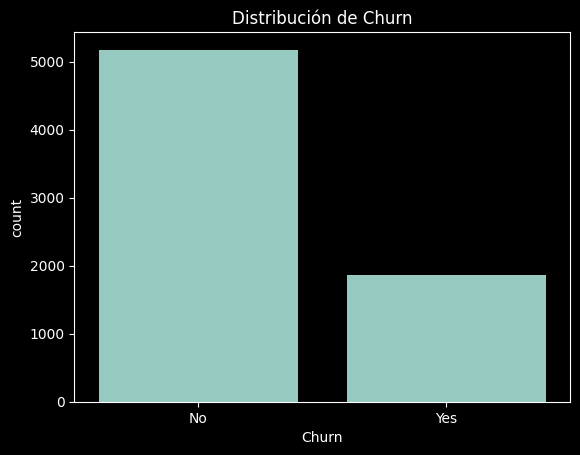

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Distribución de Churn')
plt.show()

Observamos que la mayoría de los clientes no cancelan el servicio, sin embargo existe una proporción significativa de clientes que sí lo hacen, lo cual indica que el churn representa un problema relevante para la empresa y justifica el uso de modelos predictivos.

Esto confirma la relevancia del problema y sugiere que será necesario considerar métricas más allá de accuracy, como recall y AUC.

### 3. Limpieza y calidad de datos

In [83]:
# a) Convertir TotalCharges a numérico
# 'coerce' convierte valores no numéricos (como cadenas vacías) en NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verificar cuántos valores faltantes se crearon
print('TotalCharges faltantes:', df['TotalCharges'].isnull().sum())

# b) Verificación de duplicados
duplicates = df.duplicated().sum()
print('Filas duplicadas:', duplicates)

# Verificar CustomerIDs duplicados
id_duplicates = df['customerID'].duplicated().sum()
print('CustomerIDs duplicados:', id_duplicates)

# Eliminar duplicados si los hay (aunque no se esperan según las verificaciones)
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print('Duplicados eliminados.')

TotalCharges faltantes: 11
Filas duplicadas: 0
CustomerIDs duplicados: 0


Insights:

Convertimos correctamente TotalCharges a numérico. Algunos valores se convirtieron en NaN (probablemente cadenas vacías en el archivo original).
No hay filas duplicadas en el conjunto de datos.
El ID de cliente es único para cada fila, por lo que los datos se muestran a nivel de cliente.

### 4. Análisis de valores faltantes

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


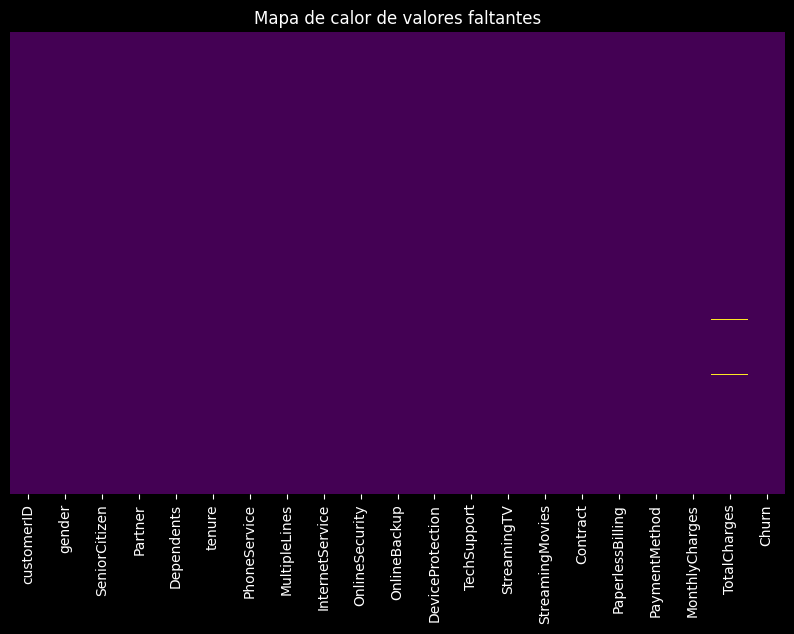

In [84]:
# Verificar valores faltantes en general
print(df.isnull().sum())

# Visualizar valores faltantes usando un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de calor de valores faltantes')
plt.show()

Insights:

Solo TotalCharges tiene valores faltantes (11 filas).
Es probable que se trate de clientes nuevos sin antigüedad. Dado que el número es muy pequeño, podemos omitirlos o completarlos con 0.
Para este análisis, simplemente omitiremos estas pocas filas para mantener los datos limpios.

In [85]:
# Manejo de los valores faltantes
df.dropna(subset=['TotalCharges'], inplace=True)
print('Nueva forma después de eliminar los faltantes:', df.shape)

Nueva forma después de eliminar los faltantes: (7032, 21)


### 5. Análisis univariado: características numéricas

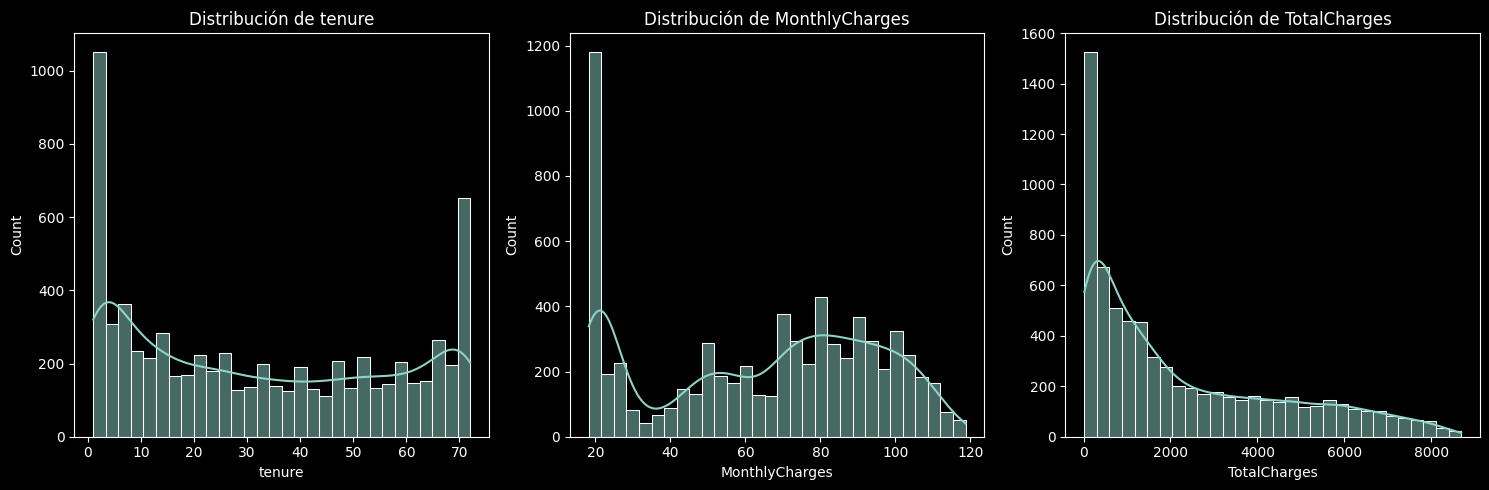

In [86]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

Insights:

Tenure: La distribución es bimodal. Muchos clientes son nuevos (menos de 5 meses) o muy fieles (más de 70 meses).

MonthlyCharges: Ligeramente sesgado a la derecha, pero muestra un pico importante en el extremo inferior (usuarios básicos) y el extremo superior.

TotalCharges: Fuertemente sesgado a la derecha. La mayoría de los clientes han pagado montos totales bajos, probablemente debido a una baja antigüedad o a cargos mensuales bajos.

### 6. Análisis univariado: características categóricas

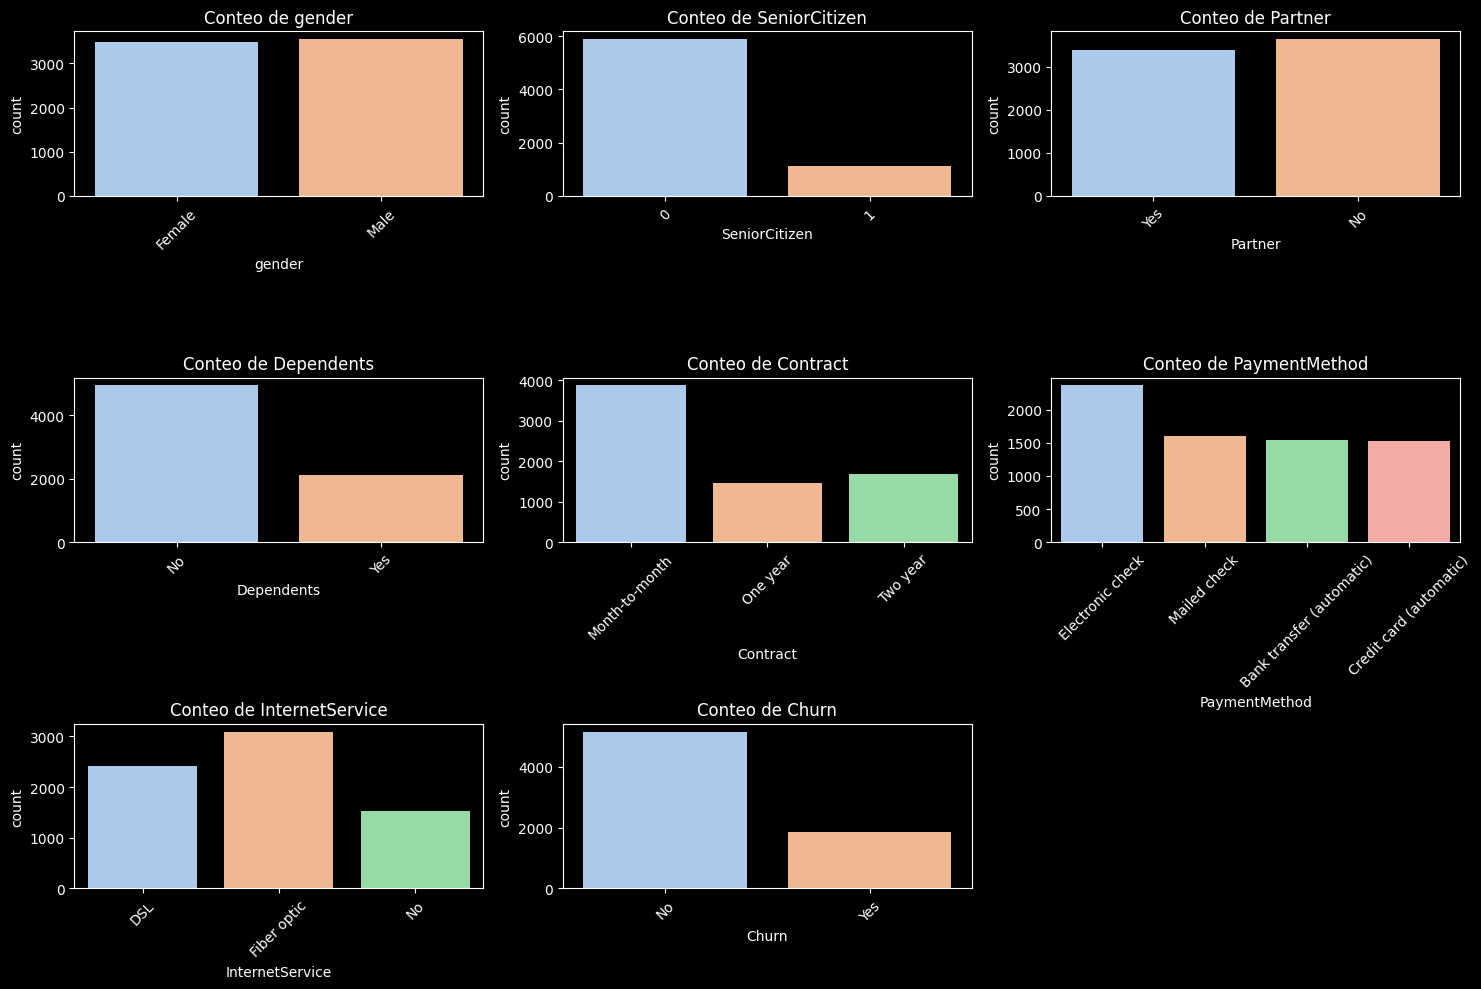

In [87]:
categorical_cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                    'PhoneService', 'InternetService', 'Contract', 'PaymentMethod', 'Churn']
dataset_cols = df.columns.tolist()

key_cats = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'PaymentMethod', 'InternetService', 'Churn']
actual_cats = [c for c in key_cats if c in dataset_cols] 

plt.figure(figsize=(15, 10))
for i, col in enumerate(actual_cats, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f'Conteo de {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:

Género: La proporción de hombres y mujeres es similar.

SeniorCitizen: La proporción de clientes mayores es muy pequeña.

Partner: La proporción de clientes con pareja es ligeramente mayor que la de clientes solteros.

Dependents: La proporción de clientes con dependientes es ligeramente mayor que la de clientes sin dependientes.

PhoneService: La proporción de clientes con servicio de teléfono es ligeramente mayor que la de clientes sin servicio de teléfono.

InternetService: La proporción de clientes con servicio de internet es ligeramente mayor que la de clientes sin servicio de internet.

Contract: La proporción de clientes con contrato de 1 año es ligeramente mayor que la de clientes con contratos de 2 años y 1 año.

PaymentMethod: La proporción de clientes con método de pago electrónico es ligeramente mayor que la de clientes con otros métodos de pago.

Churn: La proporción de clientes que abandonaron es ligeramente mayor que la de clientes que no abandonaron.

### 7. Análisis bivariado: categórico vs. abandono

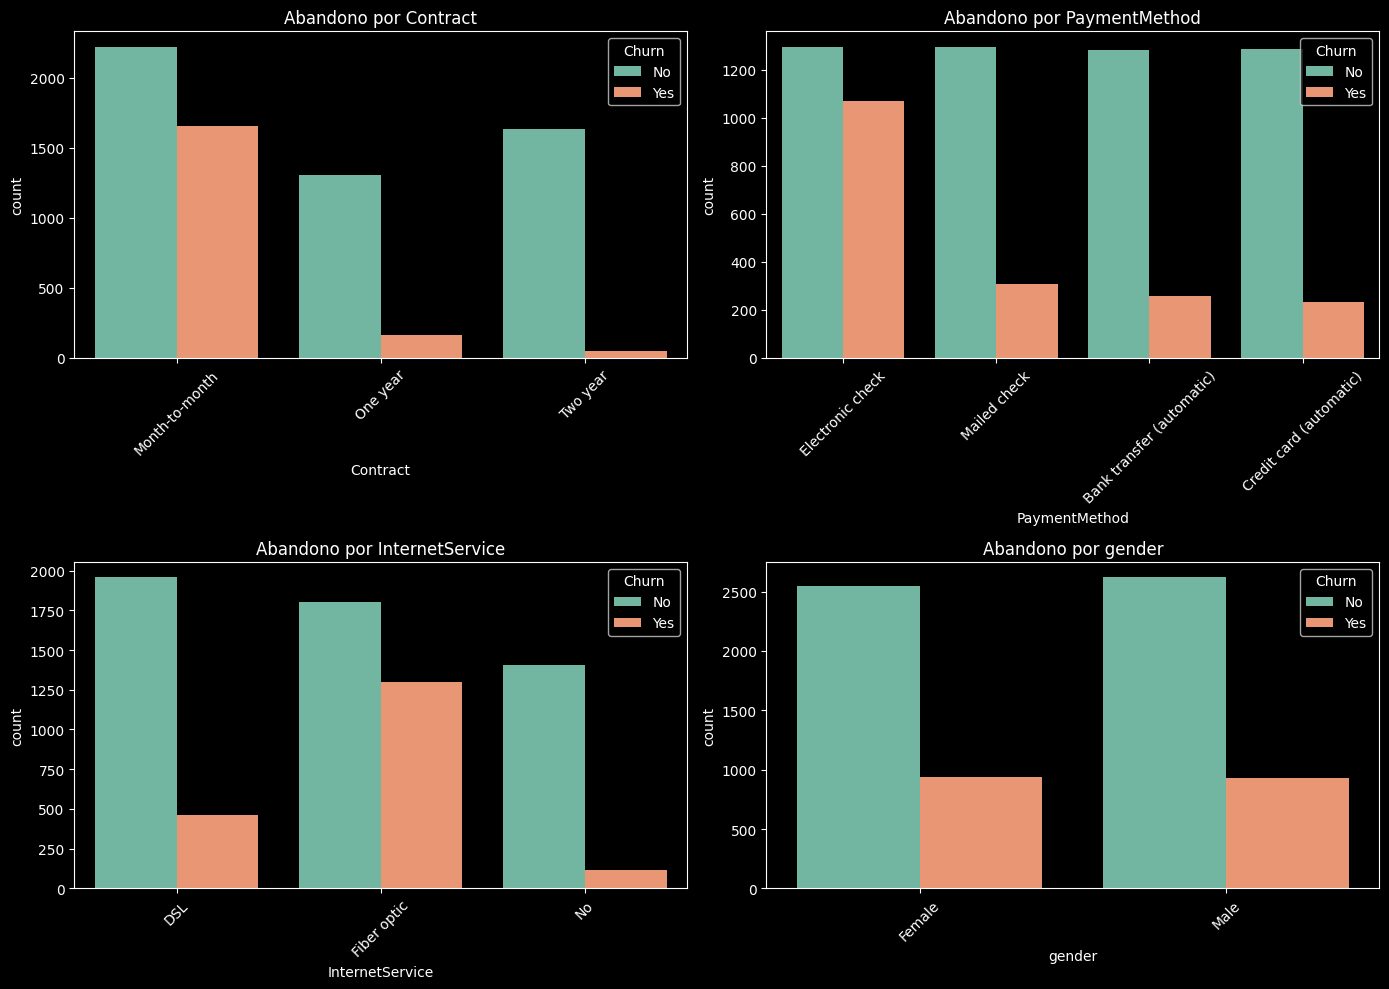

In [88]:
key_features = ['Contract', 'PaymentMethod', 'InternetService', 'gender']

plt.figure(figsize=(14, 10))
for i, col in enumerate(key_features, 1):
    # Saltamos si la columna no está en df
    if col not in df.columns: continue
    
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='Churn', data=df, palette='Set2')
    plt.title(f'Abandono por {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Insights:

Contract: Los clientes con contrato mensual tienen una tasa de abandono mucho mayor que los que tienen contratos de uno o dos años. Los contratos a largo plazo retienen mejor a los usuarios.

PaymentMethod: Los usuarios que utilizan cheque electrónico tienen la mayor tasa de abandono.

InternetService: Los clientes de fibra óptica abandonan el servicio con mayor frecuencia que los usuarios de DSL o sin internet.

Gender: La tasa de abandono parece similar entre ambos sexos, lo que sugiere que el género no es un factor determinante.

### 8. Análisis bivariado - Numérico vs Churn

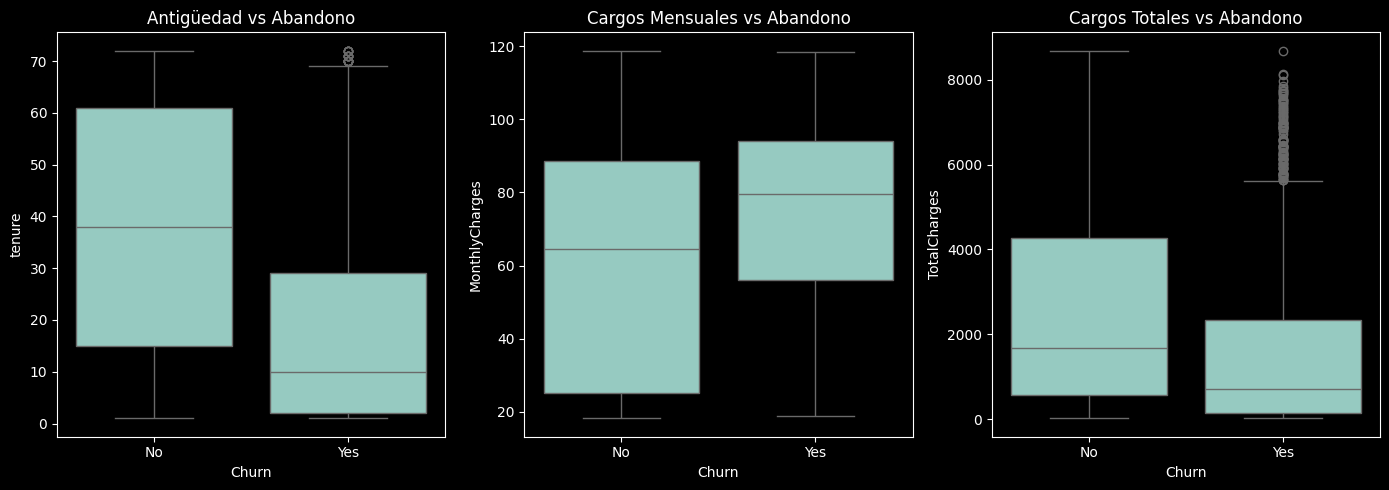

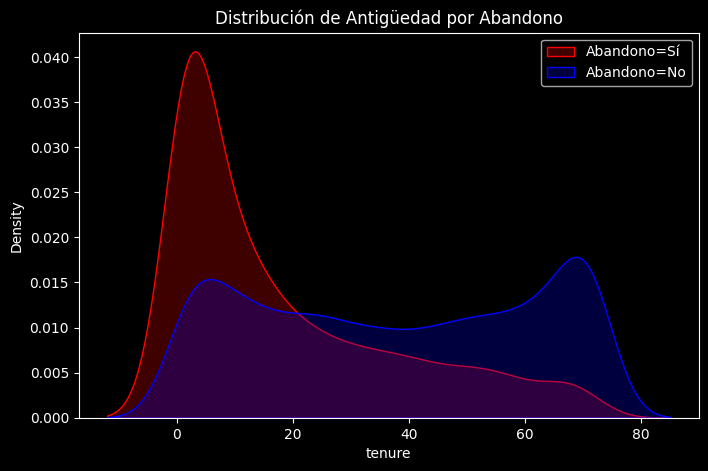

In [89]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Antigüedad vs Abandono')

plt.subplot(1, 3, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Cargos Mensuales vs Abandono')

plt.subplot(1, 3, 3)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Cargos Totales vs Abandono')

plt.tight_layout()
plt.show()

# Distribución de Antigüedad por Abandono
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df['Churn']=='Yes']['tenure'], label='Abandono=Sí', shade=True, color='red')
sns.kdeplot(df[df['Churn']=='No']['tenure'], label='Abandono=No', shade=True, color='blue')
plt.title('Distribución de Antigüedad por Abandono')
plt.legend()
plt.show()

Insights:

Tenure: Los clientes que abandonan la relación tienen una antigüedad significativamente menor (una media de unos 10 meses). Los clientes antiguos tienen menos probabilidades de abandonarla.

MonthlyCharges: Los clientes que abandonan la relación suelen tener cargos mensuales más altos.

TotalCharges: Los cargos totales de los clientes que abandonan la relación son más bajos, debido a su menor antigüedad.

### 9. Análisis de cohortes y agrupaciones

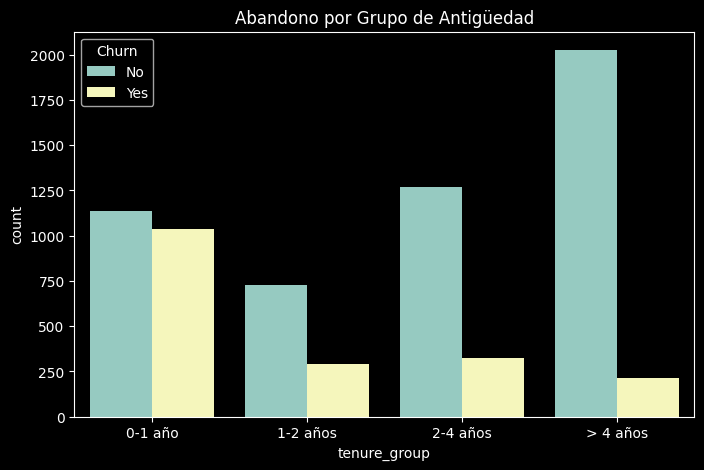

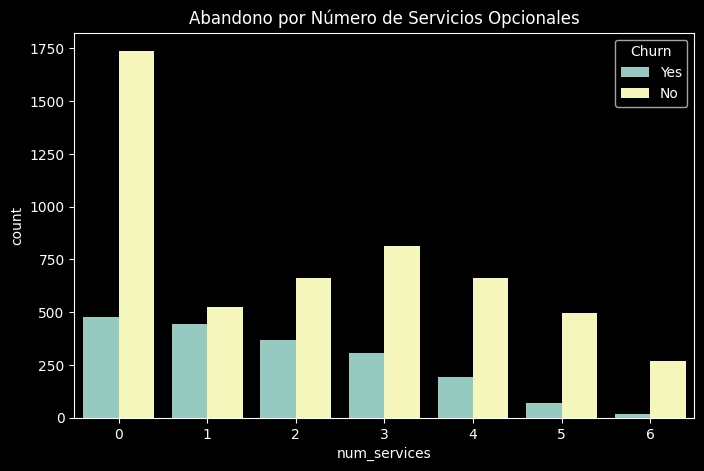

In [90]:
# a) Grupos de Antigüedad
def tenure_bucket(t):
    if t <= 12: return '0-1 año'
    elif t <= 24: return '1-2 años'
    elif t <= 48: return '2-4 años'
    else: return '> 4 años'

df['tenure_group'] = df['tenure'].apply(tenure_bucket)

plt.figure(figsize=(8, 5))
sns.countplot(x='tenure_group', hue='Churn', data=df, order=['0-1 año', '1-2 años', '2-4 años', '> 4 años'])
plt.title('Abandono por Grupo de Antigüedad')
plt.show()

# b) Número de Servicios
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

binary_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['num_services'] = df[binary_services].apply(lambda x: (x == 'Yes').sum(), axis=1)

plt.figure(figsize=(8, 5))
sns.countplot(x='num_services', hue='Churn', data=df)
plt.title('Abandono por Número de Servicios Opcionales')
plt.show()

Insights:

Tenure Group: El grupo de 0 a 1 año presenta la mayor tasa de abandono. Los nuevos clientes son los más vulnerables.

Num Services: Los clientes con muy pocos servicios (0-1) presentan mayor tasa de abandono. Aquellos con más servicios (3-4) parecen más estables (fijos).

### 10. Análisis de correlación

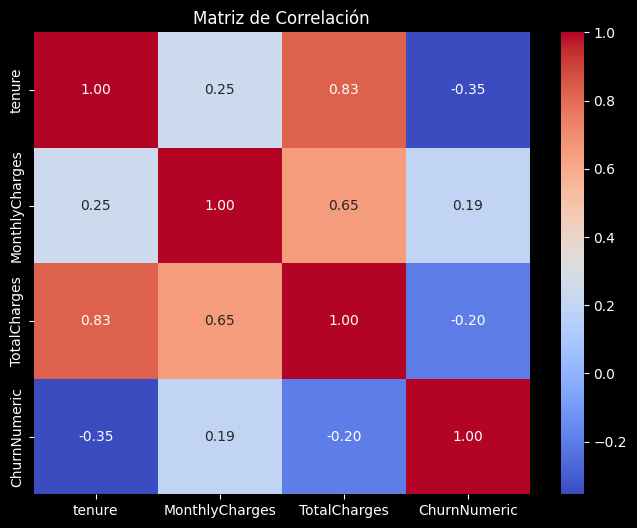

In [91]:
# Matriz de correlación para características numéricas
# También convertimos Churn a numérico (1/0) para ver la correlación con las características
df['ChurnNumeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
corr_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'ChurnNumeric']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

Insights:

Tenure: Los clientes que abandonan la relación tienen una antigüedad significativamente menor (una media de unos 10 meses). Los clientes antiguos tienen menos probabilidades de abandonarla.

MonthlyCharges: Los clientes que abandonan la relación suelen tener cargos mensuales más altos.

TotalCharges: Los cargos totales de los clientes que abandonan la relación son más bajos, debido a su menor antigüedad.

### 11. Análisis de interacción (Contract x PaymentMethod)

<Figure size 1200x600 with 0 Axes>

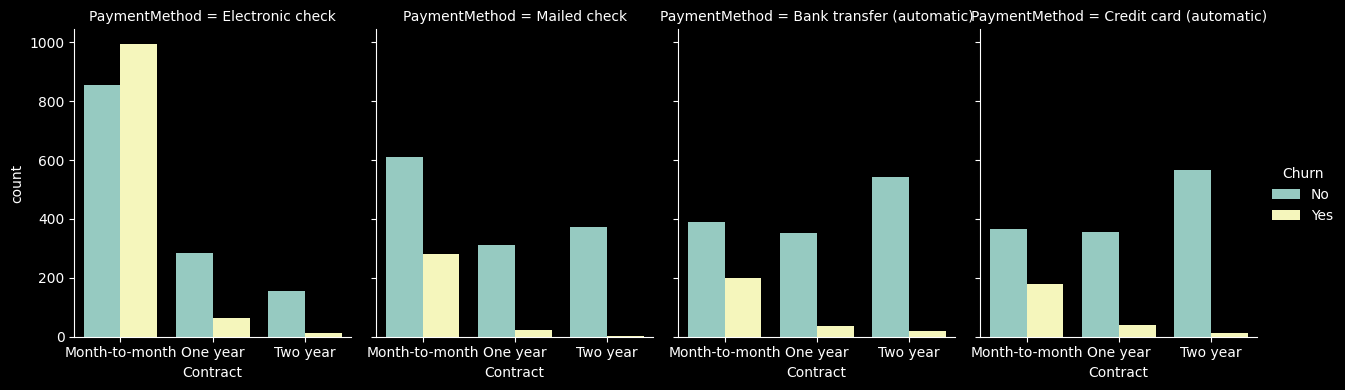

In [92]:
plt.figure(figsize=(12, 6))
sns.catplot(x='Contract', hue='Churn', col='PaymentMethod', kind='count', data=df, height=4, aspect=0.8)
plt.show()

In [93]:
# Payment Method
df.groupby("PaymentMethod")["Churn"].value_counts(normalize=True)

PaymentMethod              Churn
Bank transfer (automatic)  No       0.832685
                           Yes      0.167315
Credit card (automatic)    No       0.847469
                           Yes      0.152531
Electronic check           No       0.547146
                           Yes      0.452854
Mailed check               No       0.807980
                           Yes      0.192020
Name: proportion, dtype: float64

Insights:

La combinación de contrato mensual y cheque electrónico destaca por su alta tasa de abandono.

Este segmento específico es un objetivo prioritario para la intervención.

### 12. Conclusión final de EDA

##### Resumen de los hallazgos:

Factores de alto riesgo: Los clientes con contratos mensuales, que utilizan cheque electrónico y tienen internet de fibra óptica tienen mayor probabilidad de abandonar el servicio.

Antigüedad: La tasa de abandono es mayor durante el primer año (especialmente en los primeros meses). Los clientes a largo plazo son muy estables.
Cargos: Los cargos mensuales más altos se asocian con una mayor tasa de abandono.

Servicios: Los clientes con menos servicios adicionales (como TechSupport o OnlineSecurity) tienden a abandonar el servicio más a menudo.

##### Recomendaciones:

Intervención: Identificar nuevos clientes (de 0 a 1 año) con una mejor integración.

Precios: Revisar los precios para los usuarios de fibra óptica u ofrecer descuentos/paquetes para cambiarlos a contratos más largos.

Pagos: Investigar por qué los usuarios de cheque electrónico abandonan el servicio: ¿es difícil el proceso?

Este análisis proporciona una base sólida para la ingeniería de características y la creación de un modelo de predicción de abandono.

### 13. Feature Engineering

In [ ]:
# Definimos variables predictoras y objetivo
y = df['Churn'] # Variable objetivo
X = df.drop(['Churn', 'ChurnNumeric', 'customerID', 'tenure_group'], axis=1) # Variables predictoras

In [95]:
# Lista de características numéricas
numeric_features = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges',
    'SeniorCitizen',
    'num_services'
]
# Lista de características categóricas
categorical_features = [
    'gender',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Definimos el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features), # Escalado de características numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # Codificación One-Hot para categóricas
    ]
)

In [97]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,num_services
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,2
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,2
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0


In [98]:
X_transformed = preprocessor.fit_transform(X)

In [99]:
# Se corrobora que One-Hot encoder conviertió cada categoría en una columna nueva. Se inició con 21 columnas y ahora hay 46.
X_transformed.shape 

(7032, 46)

In [100]:
 #Se comprueba quese ha convertido en vectores matemáticos
X_transformed[0] 

array([-1.28024804, -1.16169394, -0.99419409, -0.44032709, -0.5620439 ,
        1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ])

Se han transformado las  variables categóricas mediante one-hot encoding para que el modelo pueda aprender patrones asociados a estos factores. De igual forma, las variables numéricas fueron escaladas para asegurar un entrenamiento estable y consistente.

Estas transformaciones permiten que el modelo supervisado utilice la información del negocio de forma efectiva para predecir el abandono.